simple_XRD.jl
by Hezy Amiel
January 2023
Julia 1.8.5

#Functions

In [2]:
using Plots
using SpecialFunctions

In [3]:
function Gaussian(x, fwhm)
    σ = fwhm/(2√(2log(2)))
    return @. 1/√(2π)/σ * exp(-x^2/2σ^2)
end

Gaussian (generic function with 1 method)

In [4]:
function Lorentzian(x, fwhm)
    γ = fwhm / 2
    return @. (γ/pi) / (x^2 + γ^2)
end

Lorentzian (generic function with 1 method)

In [5]:
function Pseudo_Voigt(x, fwhm, n)
	return n * Lorentzian(x, fwhm) + (1 - n) * Gaussian(x, fwhm)
end

Pseudo_Voigt (generic function with 1 method)

In [6]:
function Voigt(x, fwhm_L, fwhm_G)
    γ = fwhm_L/2
    σ = fwhm_G/(2√(2log(2)))
    z = @. -im * (x + im * γ) / (√2 * σ)
    return @. real(erfcx(z)) / (√(2pi) * σ)
end

Voigt (generic function with 1 method)

In [23]:
function peak(θ, θ₀, A, w, n)
    return @. A * Pseudo_Voigt(θ-θ₀, w, n)
end

peak (generic function with 1 method)

In [8]:
function peaks_width(two_θ_deg, U, V, W)
    two_θ_rad = two_θ_deg * π/180
    return @. √(U * tan(two_θ_rad/2)^2 + V * tan(two_θ_rad/2) + W)
end

peaks_width (generic function with 1 method)

In [9]:
function bragg_angels(wavelength, d_spacings)
    sinθ = wavelength ./ (2*d_spacings)
    sinθ_cleaned = [item for item in sinθ if abs(item)<=1]  # removing values outside (-1,1)
    return 2 * (180/π) * asin.(sinθ_cleaned)  # *2 for 2θ  
end

bragg_angels (generic function with 1 method)

In [10]:
function d_list(indices, a)
    return a ./ .√(sum(indices.^2, dims=2))
end

d_list (generic function with 1 method)

In [30]:
function intensity(θ, two_θ_list, U, V, W)
    y = zeros(size(θ))
    for item in two_θ_list
        y = y + peak(θ, item, 1, peaks_width(θ, U, V, W), 0.5)
    
    end
    return y
end


intensity (generic function with 1 method)

#General Sttings

In [34]:
N = 1000
θ = collect(LinRange(0, 180, N))
y = zeros(N)
#θ = range(start=0, stop=180, step=180/N)
wavelength = 0.15418  # CuKα radiation in nm
#wavelength = 0.18125  # 
U, V, W = 0.2, 0.2, 0.2

(0.2, 0.2, 0.2)

#Simple Cubic
In simple cubic lattince, all Miller indices are allowed

In [44]:
"""
Lattice parameter for SC Polonium (α-Po)
from https://en.wikipedia.org/wiki/Polonium 
"""
a_SC = 0.3352 

a_SC

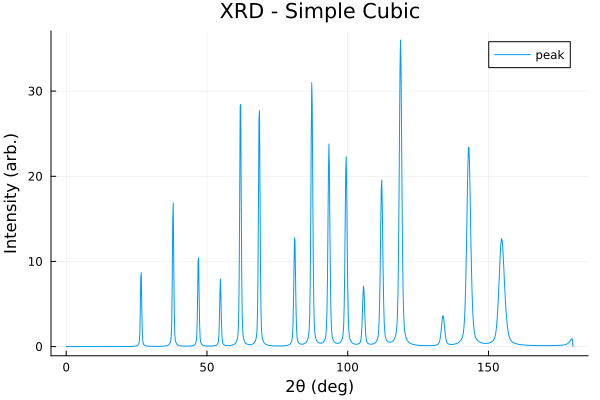

In [45]:
generate_indices = [[h,k,l] for h=-5:5 for k=-5:5 for l=-5:5 if [h,k,l]!=[0,0,0]]
indices_SC = (reduce(hcat, generate_indices))'
two_θ_list_SC = bragg_angels(wavelength, d_list(indices_SC, a_SC));
y_SC = intensity(θ, two_θ_list_SC, U, V, W)

p = plot(θ, y_SC, label="peak")
title!("XRD - Simple Cubic")
xlabel!(raw"2θ (deg)")
ylabel!(raw"Intensity (arb.)")

#Body Centered Cubic
In body centerd cubic lattice, only indices with h+k+l=even are allowed

In [46]:
"""
Lattice parameter for BCC Tantalum (α-Ta)
from https://en.wikipedia.org/wiki/Tantalum
"""
a_BCC = 0.33058

#"""
#Lattice parameter for BCC Tungsten (W)
#from https://en.wikipedia.org/wiki/Lattice_constant
#"""
#a_BCC = 0.3155

a_BCC

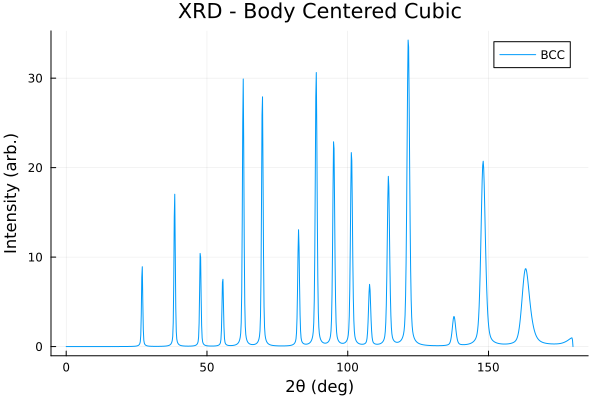

In [50]:
generate_indices_BCC = [[h,k,l] for h=0:3 for k=0:3 for l=0:3 if iseven(h+k+l) && [h,k,l]!=[0,0,0]]
indices_BCC = (reduce(hcat, generate_indices))'
two_θ_list_BCC = bragg_angels(wavelength, d_list(indices_BCC, a_BCC));
y_BCC = intensity(θ, two_θ_list_BCC, U, V, W)

p = plot(θ, y_BCC, label="BCC")
title!("XRD - Body Centered Cubic")
xlabel!(raw"2θ (deg)")
ylabel!(raw"Intensity (arb.)")

#Face Centered Cubic

In face centered cubic lattice, h,k,l must all be either odd or even

In [48]:
"""
Lattice parameter for FCC Platinum
from https://periodictable.com/Elements/078/data.html
"""
a_FCC = 0.39242 

#"""
#Lattice parameter a for FCC Pb
#from https://en.wikipedia.org/wiki/Lattice_constant
#"""
#a_FCC = 0.4920 

a_FCC

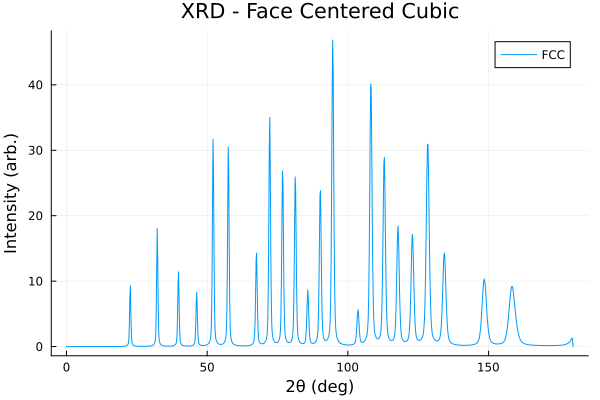

In [49]:
generate_indices_FCC = [[h,k,l] for h=0:3 for k=0:3 for l=0:3 if (iseven(h) && iseven(k) && iseven(l))||(isodd(h) && isodd(k) && isodd(l)) && [h,k,l]!=[0,0,0]]
indices_FCC = (reduce(hcat, generate_indices))'
two_θ_list_FCC = bragg_angels(wavelength, d_list(indices_FCC, a_FCC));
y_FCC = intensity(θ, two_θ_list_FCC, U, V, W)

p = plot(θ, y_FCC, label="FCC")
title!("XRD - Face Centered Cubic")
xlabel!(raw"2θ (deg)")
ylabel!(raw"Intensity (arb.)")